# Importacion de librerias

In [ ]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from google.colab import drive
drive.mount('/content/drive')

# Seteo el tamano de todas las etiquetas
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#  Importo estetica para el texto
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms
styles = mpatch.BoxStyle.get_styles()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hecho con Polyfit

In [ ]:
def AjustePolyfit(x,y, error_y, ejex, ejey, residuos, titulo, formula):
 #  Hacemos el ajuste con polyfit
  pars, cov = np.polyfit(x, y, deg=1, w = 1/error_y, cov=True)
  a, b = pars # Parametros a y b obtenidos del ajuste lineal
  Sa, Sb = np.sqrt(np.diag(cov)) # Errores de a y de b del ajuste lineal
  y_ajustado = a*x + b  # en esta linea obtenemos el valor en y del ajuste para cada valor de x que sea medido

  # Graficamos los datos medidos con error en errorbar y el ajuste en plot
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
  ax[0].errorbar(x, y, xerr = 0, yerr = error_y, fmt='.', color = "blue", label="Mediciones")
  ax[0].plot(x, y_ajustado, label=formula, color = "darkgreen")

  # Seteo parametros del grafico
  ax[0].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[0].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[0].minorticks_on()
  ax[0].set_ylabel(ejey)
  ax[0].set_title(label=titulo, color = "black", fontweight =  "bold")
  ax[0].legend(facecolor = "bisque")

  # Graficamos los residuos

  ax[1].errorbar(x, y - y_ajustado, xerr = 0, yerr = error_y, fmt='.', label="Residuos", color="red")
  ax[1].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[1].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[1].minorticks_on()
  ax[1].set_xlabel(str(ejex))
  ax[1].set_ylabel(residuos)
  ax[1].legend(facecolor= "aquamarine")

  # Calculamos parametros estadisticos
  res_sq = (y - y_ajustado)**2
  # variabilidad intrínseca
  ss_tot = np.sum((y - np.mean(y)) ** 2)
  # R²
  r2 = 1 - (np.sum(res_sq) / ss_tot)
  # χ²
  ss = res_sq/error_y**2
  ch2 = np.sum(ss)/(len(y)-2)
  # pearson
  from scipy.stats import pearsonr
  rp = pearsonr(x, y)[0]

  ax[0].text(x = 0.73, y = 0.08, s = "Parámetros:" +
           '\nχ² = ' + f'{float(f"{ch2:.3g}"):g}' + '  R² = ' + f'{float(f"{r2:.4g}"):g}' +
            '\nR Pearson = ' + f'{float(f"{rp:.4g}"):g}'+
           '\n$a = $' + f'{float(f"{a:.3g}"):g}' + " ± " f'{float(f"{Sa:.3g}"):g}' +
           '\n$b = $(' + f'{float(f"{b:.3g}"):g}' + " ± " f'{float(f"{Sb:.3g}"):g})' + r' $[ud]$',
            bbox = dict(boxstyle="round", color = "lavender", alpha = 0.7), transform= ax[0].transAxes, color='black')
  #plt.show()

  # Imprimimos parametros
  print(f'Obtuvimos a, valor de pendiente = {a:.8f} ± {Sa:.8f}')
  print(f'Obtuvimos b, ordenada al origen = {b:.8f} ± {Sb:.8f}')
  print(f'R² = {r2}')
  print(f'χ² = {ch2}')
  print(f'r_p = {rp}')

  return a, Sa, b, Sb

# Hecho con curvefit sin ordenada al origen

In [ ]:
def LinealSinOrdenada(x,a):
  y = a*x
  return y

# Definimos una funcion que realiza el grafico.
def AjusteCurveFitSinOrdenada(x, y, error_y, ejex, ejey, y_residuos, titulo, formula):
  #Ajustamos
  popt,pcov = curve_fit(LinealSinOrdenada,x,y, sigma = error_y)
  a = popt
  Sa = np.sqrt(np.diag(pcov))
  # para que se vea mejor el ajuste en el gráfico
  x1 = np.linspace(min(x),max(x),10000)
  y_ajustado = LinealSinOrdenada(x1,a)

  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
  # Grafico de arriba (el ajuste y las mediciones)
  ax[0] = plt.subplot(2,1,1)
  ax[0].plot(x1,y_ajustado,label=formula, color = "red")
  ax[0].errorbar(x, y, yerr = error_y, fmt='.', label='Mediciones', alpha = 1.0, color= "darkgreen")

  ax[0].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[0].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[0].minorticks_on()
  ax[0].set_ylabel(ejey)
  ax[0].set_title(label=titulo, color = "black", fontweight =  "bold")
  ax[0].legend(facecolor = "bisque")


  # hago la resta del valor de la funcion vs el del ajuste, asi obtenemos los residuos
  residuos = y - a*x
  ax[1].errorbar(x, residuos, xerr = 0, yerr = error_y, fmt=".", label="Residuos", color="blue")
  ax[1].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[1].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[1].minorticks_on()
  ax[1].set_xlabel(str(ejex))
  ax[1].set_ylabel(y_residuos)
  ax[1].legend(facecolor= "aquamarine")

  # Calculamos parametros estadisticos
  res_sq = (residuos)**2
  # variabilidad intrínseca
  ss_tot = np.sum((y - np.mean(y)) ** 2)
  # R²
  r2 = 1 - (np.sum(res_sq) / ss_tot)
  # χ²
  ss = res_sq/error_y**2
  ch2 = np.sum(ss)/(len(y)-1)
  # pearson
  from scipy.stats import pearsonr
  rp = pearsonr(x, y)[0]

  ax[0].text(x = 0.73, y = 0.08, s = "Parámetros:" +
           '\nχ² = ' + f'{float(f"{ch2:.3g}"):g}' + '  R² = ' + f'{float(f"{r2:.4g}"):g}' +
            '\nR Pearson = ' + f'{float(f"{rp:.4g}"):g}'+
           '\n$a = $' + f'{float(f"{a[0]:.3g}"):g}' + " ± " f'{float(f"{Sa[0]:.3g}"):g}',
            bbox = dict(boxstyle="round", color = "lavender", alpha = 0.7), transform= ax[0].transAxes, color='black')

  # Imprimimos los parámetros óptimos
  print("Parametros de la medicion del objeto: ")
  print(f'a=({a[0]:.10f} ± {Sa[0]:.10f}) ')
  print(f'R² = {r2}')
  print(f'χ² = {ch2}')
  print(f'r_p = {rp}')
  return a, Sa

# Hecho con CurveFit con ordenada al origen

In [ ]:
def LinealConOrdenada(x,a,b):
  y = a*x + b
  return y

# Definimos una funcion que realiza el grafico.
def AjusteLinealCurveFit(x, y, error_y, ejex, ejey, y_residuos, titulo, formula):
  #Ajustamos
  popt,pcov = curve_fit(LinealConOrdenada,x,y, sigma = error_y)
  a, b = popt
  Sa, Sb = np.sqrt(np.diag(pcov))
  # para que se vea mejor el ajuste en el gráfico
  x1 = np.linspace(min(x),max(x),10000)
  y_ajustado = LinealConOrdenada(x1,a, b)

  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
  # Grafico de arriba (el ajuste y las mediciones)
  ax[0] = plt.subplot(2,1,1)
  ax[0].plot(x1,y_ajustado,label=formula, color = "blue")
  ax[0].errorbar(x, y, yerr = error_y, fmt='.', label='Mediciones', alpha = 1.0, color= "darkgreen")

  ax[0].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[0].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[0].minorticks_on()
  ax[0].set_ylabel(ejey)
  ax[0].set_title(label=titulo, color = "black", fontweight =  "bold")
  ax[0].legend(facecolor = "bisque")


  # hago la resta del valor de la funcion vs el del ajuste, asi obtenemos los residuos
  residuos = y - LinealConOrdenada(x,a,b)
  ax[1].errorbar(x, residuos, xerr = 0, yerr = error_y, fmt=".", label="Residuos", color="red")
  ax[1].grid(which='major', color='black', linestyle='-',alpha=0.6)
  ax[1].grid(which='minor', color='black', linestyle='-',alpha=0.3)
  ax[1].minorticks_on()
  ax[1].set_xlabel(str(ejex))
  ax[1].set_ylabel(y_residuos)
  ax[1].legend(facecolor= "aquamarine")

  # Calculamos parametros estadisticos
  res_sq = (residuos)**2
  # variabilidad intrínseca
  ss_tot = np.sum((y - np.mean(y)) ** 2)
  # R²
  r2 = 1 - (np.sum(res_sq) / ss_tot)
  # χ²
  ss = res_sq/error_y**2
  ch2 = np.sum(ss)/(len(y)-2)
  # pearson
  from scipy.stats import pearsonr
  rp = pearsonr(x, y)[0]

  ax[0].text(x = 0.73, y = 0.08, s = "Parámetros:" +
           '\nχ² = ' + f'{float(f"{ch2:.3g}"):g}' + '  R² = ' + f'{float(f"{r2:.4g}"):g}' +
            '\nR Pearson = ' + f'{float(f"{rp:.4g}"):g}'+
           '\n$a = $' + f'{float(f"{a:.3g}"):g}' + " ± " f'{float(f"{Sa:.3g}"):g}' +
            '\n$b = $(' + f'{float(f"{b:.3g}"):g}' + " ± " f'{float(f"{Sb:.3g}"):g})' + r' $[ud]$',
            bbox = dict(boxstyle="round", color = "lavender", alpha = 0.7), transform= ax[0].transAxes, color='black')
  #plt.show()
  # Imprimimos parametros
  print(f'Obtuvimos a, valor de pendiente = {a:.8f} ± {Sa:.8f}')
  print(f'Obtuvimos b, ordenada al origen = {b:.8f} ± {Sb:.8f}')
  print(f'R² = {r2}')
  print(f'χ² = {ch2}')
  print(f'r_p = {rp}')
  return a, Sa, b, Sb

# Pruebo ajuste

m= 8
b= 0
Obtuvimos a, valor de pendiente = 8.02165265 ± 0.00511427
Obtuvimos b, ordenada al origen = 0.27401508 ± 0.08495007
R² = 0.9999751438793377
χ² = 48.141508337624636
r_p = 0.9999904249922362
Obtuvimos a, valor de pendiente = 8.02165265 ± 0.00511427
Obtuvimos b, ordenada al origen = 0.27401517 ± 0.08495010
R² = 0.9999751438813047
χ² = 48.14150833762376
r_p = 0.9999904249922362
Parametros de la medicion del objeto: 
a=(8.0349995789 ± 0.0034589010) 
R² = 0.9999647273870617
χ² = 63.75347414178027
r_p = 0.9999904249922362


(array([8.03499958]), array([0.0034589]))

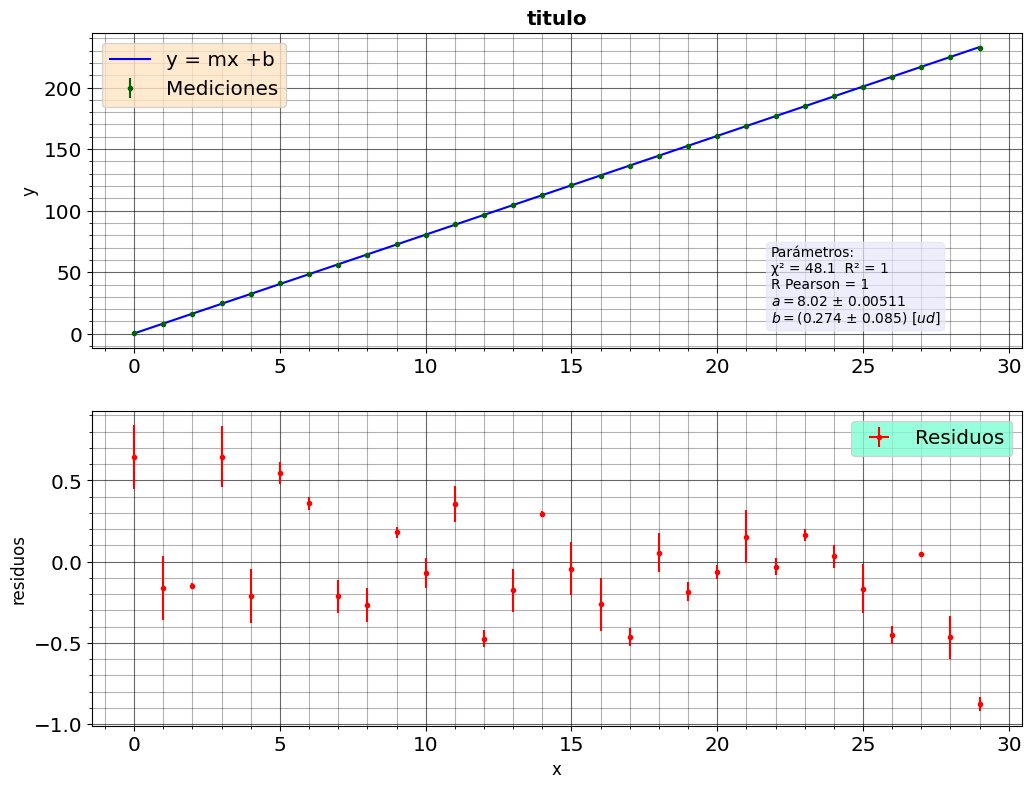

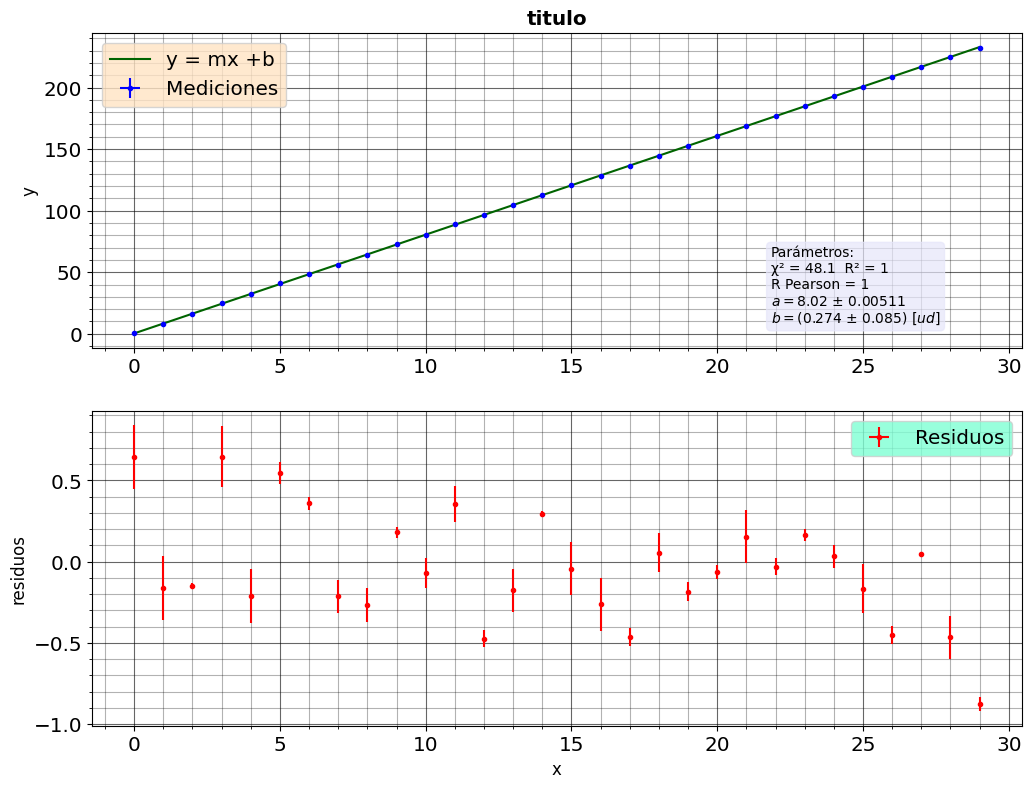

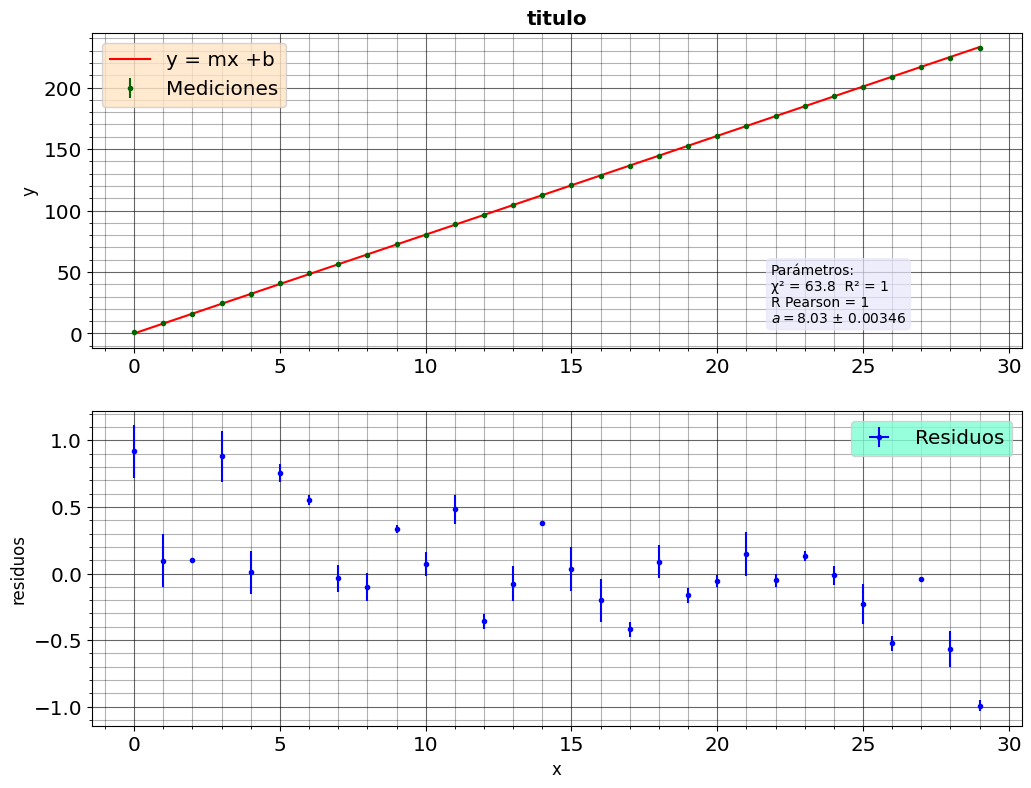

In [ ]:
# Genero datos
x = np.array([])
for i in range(0,30):
  x = np.append(x, i)
ruido = np.random.rand(30)
m = int(np.random.rand()*10)
b = int(np.random.rand()*10)
y_exacto = m*x + b
y = y_exacto + ruido
error_y = np.random.rand(30)/5
print("m= "+str(m))
print("b= "+str(b))
AjusteLinealCurveFit(x,y,error_y, "x","y","residuos", "titulo","y = mx +b")
AjustePolyfit(x,y,error_y, "x","y","residuos", "titulo","y = mx +b")
AjusteCurveFitSinOrdenada(x,y,error_y, "x","y","residuos", "titulo","y = mx +b")
